In [1]:


import pandas as pd

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:


# Dataset shape
print("Shape of dataset:", df.shape)

# Column names
print("\nColumns:\n", df.columns.tolist())

# Data types & non-null counts
print("\nData Info:\n")
df.info()

# Check for missing values
print("\nMissing values:\n")
print(df.isnull().sum())

# How churned vs not churned looks
print("\nChurn Distribution:\n")
print(df['Churn'].value_counts())


Shape of dataset: (7043, 21)

Columns:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 

In [3]:


# Convert TotalCharges from object to float (some values are blank strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows where TotalCharges is NaN
df = df.dropna(subset=['TotalCharges'])

# Convert SeniorCitizen to Yes/No
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})


In [4]:


df.isnull().sum()  # Make sure no nulls remain


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Matplotlib is building the font cache; this may take a moment.
C:\Users\vallabhee\AppData\Local\Temp\ipykernel_15388\2834811688.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


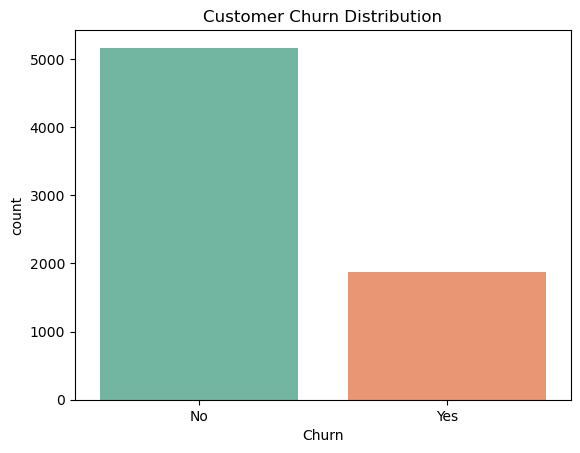

In [5]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plot churn distribution
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Customer Churn Distribution')
plt.show()


In [6]:
# Drop customerID (not useful for prediction)
df = df.drop('customerID', axis=1)

# Convert all categorical variables to numeric using get_dummies
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,34,56.95,1889.50,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,2,53.85,108.15,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,45,42.30,1840.75,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,2,70.70,151.65,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [7]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


C:\Users\vallabhee\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
from sklearn.preprocessing import StandardScaler

# Scale the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# Train the model with scaled features
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7874911158493249

Confusion Matrix:
 [[915 118]
 [181 193]]

Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.89      0.86      1033
        True       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [12]:
# Feature importance
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coeff_df.head(10)


,Feature,Coefficient
2,TotalCharges,0.694885
10,InternetService_Fiber optic,0.650749
23,StreamingMovies_Yes,0.222440
21,StreamingTV_Yes,0.212963
9,MultipleLines_Yes,0.160546
26,PaperlessBilling_Yes,0.134580
28,PaymentMethod_Electronic check,0.123558
4,SeniorCitizen_Yes,0.094976
17,DeviceProtection_Yes,0.040129
8,MultipleLines_No phone service,0.029736


C:\Users\vallabhee\AppData\Local\Temp\ipykernel_15388\2426389869.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='coolwarm')


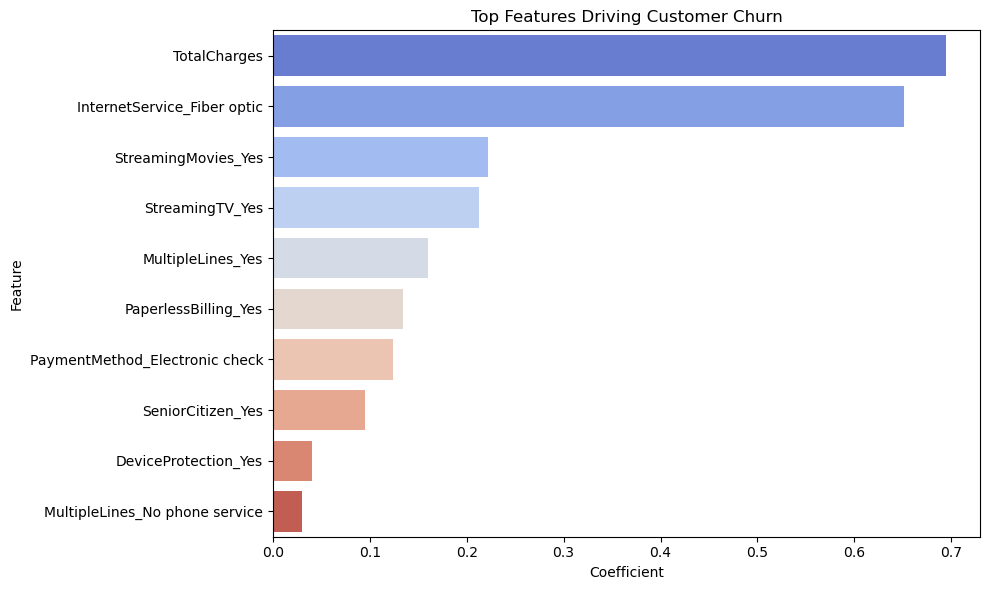

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 10 features influencing churn
top_features = coeff_df.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='coolwarm')
plt.title('Top Features Driving Customer Churn')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
